## Import Libraries

In [2]:
# Load libraries
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# User libraries
import FootballDB as fdb
import Features as features

In [3]:
# Pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)
# Matplotlib Options
%matplotlib notebook

## Prepare Data

In [4]:
# Load dataframe
df = pd.read_csv('../Data/clean_data_20200128.csv',dtype=str)
df #show dataframe

,AwayTeam,Date,Div,FTAG,FTHG,FTR,HomeTeam,Source,Season,AC,AF,AR,AS,AST,AY,HC,HF,HR,HS,HST,HTAG,HTHG,HTR,HY,Referee
0,Aston Villa,2015-08-08,E0,1.0,0.0,A,Bournemouth,football-data-uk,1516,3.0,13.0,0.0,7.0,3.0,4.0,6.0,13.0,0.0,11.0,2.0,0.0,0.0,D,3.0,M Clattenburg
1,Swansea,2015-08-08,E0,2.0,2.0,D,Chelsea,football-data-uk,1516,8.0,16.0,0.0,18.0,10.0,3.0,4.0,15.0,1.0,11.0,3.0,1.0,2.0,H,1.0,M Oliver
2,Watford,2015-08-08,E0,2.0,2.0,D,Everton,football-data-uk,1516,2.0,13.0,0.0,11.0,5.0,2.0,8.0,7.0,0.0,10.0,5.0,1.0,0.0,A,1.0,M Jones
3,Sunderland,2015-08-08,E0,2.0,4.0,H,Leicester,football-data-uk,1516,3.0,17.0,0.0,10.0,5.0,4.0,6.0,13.0,0.0,19.0,8.0,0.0,3.0,H,2.0,L Mason
4,Tottenham,2015-08-08,E0,0.0,1.0,H,Man United,football-data-uk,1516,2.0,12.0,0.0,9.0,4.0,3.0,1.0,12.0,0.0,9.0,1.0,0.0,1.0,H,2.0,J Moss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17703,Fulham,2008-05-11,E0,1.0,0.0,A,Portsmouth,football-data-uk,0708,6.0,11.0,0.0,7.0,4.0,0.0,5.0,13.0,0.0,15.0,10.0,0.0,0.0,D,0.0,M Clattenburg
17704,Arsenal,2008-05-11,E0,1.0,0.0,A,Sunderland,football-data-uk,0708,4.0,12.0,0.0,12.0,8.0,1.0,3.0,14.0,0.0,13.0,5.0,1.0,0.0,A,1.0,K Stroud
17705,Liverpool,2008-05-11,E0,2.0,0.0,A,Tottenham,football-data-uk,0708,4.0,9.0,0.0,18.0,12.0,1.0,8.0,11.0,0.0,6.0,3.0,0.0,0.0,D,1.0,U Rennie
17706,Aston Villa,2008-05-11,E0,2.0,2.0,D,West Ham,football-data-uk,0708,8.0,21.0,0.0,13.0,8.0,2.0,7.0,9.0,0.0,16.0,8.0,1.0,1.0,D,2.0,M Dean


In [5]:
# Convert datatypes
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True,errors='ignore')
## Numeric
num_cols = ['FTAG','FTHG','AC','AF','AR','AS','AST','AY','HC','HF','HR','HS','HST','HTAG','HTHG','HY']
for c in num_cols:
    df[c] = pd.to_numeric(df[c])
df.dtypes

AwayTeam            object
Date        datetime64[ns]
Div                 object
FTAG               float64
FTHG               float64
FTR                 object
HomeTeam            object
Source              object
Season              object
AC                 float64
AF                 float64
AR                 float64
AS                 float64
AST                float64
AY                 float64
HC                 float64
HF                 float64
HR                 float64
HS                 float64
HST                float64
HTAG               float64
HTHG               float64
HTR                 object
HY                 float64
Referee             object
dtype: object

In [6]:
# Check missing data
missing_df = df.isna()
missing_df.apply(sum,axis='rows')

AwayTeam    0
Date        0
Div         0
FTAG        0
FTHG        0
FTR         0
HomeTeam    0
Source      0
Season      0
AC          0
AF          0
AR          0
AS          0
AST         0
AY          0
HC          0
HF          0
HR          0
HS          0
HST         0
HTAG        0
HTHG        0
HTR         0
HY          0
Referee     0
dtype: int64

## Summary Statitistics

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17708 entries, 0 to 17707
Data columns (total 25 columns):
AwayTeam    17708 non-null object
Date        17708 non-null datetime64[ns]
Div         17708 non-null object
FTAG        17708 non-null float64
FTHG        17708 non-null float64
FTR         17708 non-null object
HomeTeam    17708 non-null object
Source      17708 non-null object
Season      17708 non-null object
AC          17708 non-null float64
AF          17708 non-null float64
AR          17708 non-null float64
AS          17708 non-null float64
AST         17708 non-null float64
AY          17708 non-null float64
HC          17708 non-null float64
HF          17708 non-null float64
HR          17708 non-null float64
HS          17708 non-null float64
HST         17708 non-null float64
HTAG        17708 non-null float64
HTHG        17708 non-null float64
HTR         17708 non-null object
HY          17708 non-null float64
Referee     17708 non-null object
dtypes: datetime6

In [8]:
# Describe numerical columns
df.describe()

,FTAG,FTHG,AC,AF,AR,AS,AST,AY,HC,HF,HR,HS,HST,HTAG,HTHG,HY
count,17708.000000,17708.000000,17708.000000,17708.000000,17708.000000,17708.000000,17708.000000,17708.000000,17708.00000,17708.000000,17708.000000,17708.000000,17708.000000,17708.000000,17708.000000,17708.000000
mean,1.129546,1.487237,4.830966,12.164287,0.098771,10.341093,4.702155,1.736491,6.11603,11.536358,0.065116,13.140916,6.004834,0.491696,0.657740,1.361282
std,1.090288,1.243453,2.662541,3.976644,0.317968,4.312221,2.672830,1.281925,3.00947,3.823368,0.258576,4.893532,3.122735,0.705677,0.811694,1.160620
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,3.000000,9.000000,0.000000,7.000000,3.000000,1.000000,4.00000,9.000000,0.000000,10.000000,4.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,5.000000,12.000000,0.000000,10.000000,4.000000,2.000000,6.00000,11.000000,0.000000,13.000000,6.000000,0.000000,0.000000,1.000000
75%,2.000000,2.000000,6.000000,15.000000,0.000000,13.000000,6.000000,3.000000,8.00000,14.000000,0.000000,16.000000,8.000000,1.000000,1.000000,2.000000
max,8.000000,9.000000,19.000000,35.000000,3.000000,35.000000,20.000000,9.000000,22.00000,33.000000,3.000000,43.000000,27.000000,5.000000,6.000000,11.000000


## Analysis

In [9]:
# List E0 teams
ana_df = df
ana_df = ana_df.loc[ana_df['Div']=='E0',:]
E0_teams = ana_df.HomeTeam.unique()
np.append(E0_teams,ana_df.AwayTeam.unique())
E0_teams

array(['Bournemouth', 'Chelsea', 'Everton', 'Leicester', 'Man United',
       'Norwich', 'Arsenal', 'Newcastle', 'Stoke', 'West Brom',
       'Aston Villa', 'Southampton', 'Sunderland', 'Swansea', 'Tottenham',
       'Watford', 'West Ham', 'Crystal Palace', 'Man City', 'Liverpool',
       'Brighton', 'Burnley', 'Huddersfield', 'QPR', 'Hull', 'Blackburn',
       'Bolton', 'Middlesbrough', 'Portsmouth', 'Birmingham', 'Charlton',
       'Fulham', 'Leeds', 'Derby', 'Ipswich', 'Reading', 'Wigan',
       'Wolves', 'Cardiff', 'Sheffield United', 'Coventry', 'Bradford',
       'Blackpool'], dtype=object)

In [10]:
# Assign team colours for analysis
team_colours = \
{'Bournemouth': ['#ed1c24', '#000000'],'Chelsea': ['#034694', '#034694'],'Leicester': ['#0053a0', '#ffffff'],\
 'Man United': ['#da030e', '#ffe500'],'Norwich': ['#00a650', '#fff200'],'Arsenal': ['#ef0107', '#023474'],\
 'Newcastle': ['#000000', '#ffffff'],'Stoke': ['#1b449c', '#e03a3e'],'West Brom': ['#091453', '#ffffff'],\
 'Aston Villa': ['#a3c5e9', '#7b003a'],'Southampton': ['#ff0000', '#ffffff'],'Sunderland': ['#ffffff', '#eb172b'],\
 'Swansea': ['#222222', '#8a0829'],'Tottenham': ['#ffffff', '#000040'],'Watford': ['#fbee23', '#ed2127'],\
 'West Ham': ['#7f0000', '#7acbe5'],'Crystal Palace': ['#292d6b', '#c4122e'],'Man City': ['#97c1e7', '#97c1e7'],
 'Liverpool': ['#dd0000', '#dd0000'],'Brighton': ['#005daa', '#ffffff'],'Burnley': ['#80bfff', '#800000'],\
 'Huddersfield': ['#192552', '#ffffff'],'QPR': ['#fd35c8', '#0c00cd'],'Hull': ['#f5971d', '#231f20'],\
 'Blackburn': ['#78bcff', '#ff0000'],'Bolton': ['#263c7e', '#df0024'],'Middlesbrough': ['#ffffff', '#942923'],\
 'Portsmouth': ['#001489', '#e1e4f3'],'Birmingham': ['#2d5593', '#ffffff'],'Charlton': ['#d4021d', '#000000'],\
 'Fulham': ['#000000', '#cc0000'],'Leeds': ['#1D428A', '#FFCD00'],'Derby': ['#000040', '#bbbbda'],\
 'Ipswich': ['#3a64a3', '#de2c37'],'Reading': ['#004494', '#dd9300'],'Wigan': ['#1d59af', '#006838'],\
 'Wolves': ['#fdb913', '#000000'],'Cardiff': ['#003366', '#ffffff'],'Sheffield United': ['#010101', '#ec2227'],\
 'Coventry': ['#77bbff', '#007711'],'Bradford': ['#fdb913', '#800000'],'Blackpool': ['#ffffff', '#ff5f00']}
team_colours #show

{'Bournemouth': ['#ed1c24', '#000000'],
 'Chelsea': ['#034694', '#034694'],
 'Leicester': ['#0053a0', '#ffffff'],
 'Man United': ['#da030e', '#ffe500'],
 'Norwich': ['#00a650', '#fff200'],
 'Arsenal': ['#ef0107', '#023474'],
 'Newcastle': ['#000000', '#ffffff'],
 'Stoke': ['#1b449c', '#e03a3e'],
 'West Brom': ['#091453', '#ffffff'],
 'Aston Villa': ['#a3c5e9', '#7b003a'],
 'Southampton': ['#ff0000', '#ffffff'],
 'Sunderland': ['#ffffff', '#eb172b'],
 'Swansea': ['#222222', '#8a0829'],
 'Tottenham': ['#ffffff', '#000040'],
 'Watford': ['#fbee23', '#ed2127'],
 'West Ham': ['#7f0000', '#7acbe5'],
 'Crystal Palace': ['#292d6b', '#c4122e'],
 'Man City': ['#97c1e7', '#97c1e7'],
 'Liverpool': ['#dd0000', '#dd0000'],
 'Brighton': ['#005daa', '#ffffff'],
 'Burnley': ['#80bfff', '#800000'],
 'Huddersfield': ['#192552', '#ffffff'],
 'QPR': ['#fd35c8', '#0c00cd'],
 'Hull': ['#f5971d', '#231f20'],
 'Blackburn': ['#78bcff', '#ff0000'],
 'Bolton': ['#263c7e', '#df0024'],
 'Middlesbrough': ['#ffffff',

In [11]:
# Assign one colour for analysis
team_colours1 = {k:v[0] for k,v in team_colours.items()}
team_colours1

{'Bournemouth': '#ed1c24',
 'Chelsea': '#034694',
 'Leicester': '#0053a0',
 'Man United': '#da030e',
 'Norwich': '#00a650',
 'Arsenal': '#ef0107',
 'Newcastle': '#000000',
 'Stoke': '#1b449c',
 'West Brom': '#091453',
 'Aston Villa': '#a3c5e9',
 'Southampton': '#ff0000',
 'Sunderland': '#ffffff',
 'Swansea': '#222222',
 'Tottenham': '#ffffff',
 'Watford': '#fbee23',
 'West Ham': '#7f0000',
 'Crystal Palace': '#292d6b',
 'Man City': '#97c1e7',
 'Liverpool': '#dd0000',
 'Brighton': '#005daa',
 'Burnley': '#80bfff',
 'Huddersfield': '#192552',
 'QPR': '#fd35c8',
 'Hull': '#f5971d',
 'Blackburn': '#78bcff',
 'Bolton': '#263c7e',
 'Middlesbrough': '#ffffff',
 'Portsmouth': '#001489',
 'Birmingham': '#2d5593',
 'Charlton': '#d4021d',
 'Fulham': '#000000',
 'Leeds': '#1D428A',
 'Derby': '#000040',
 'Ipswich': '#3a64a3',
 'Reading': '#004494',
 'Wigan': '#1d59af',
 'Wolves': '#fdb913',
 'Cardiff': '#003366',
 'Sheffield United': '#010101',
 'Coventry': '#77bbff',
 'Bradford': '#fdb913',
 'Blac

In [12]:
# Aggregate team stats
ana_df = df
ana_df = ana_df.loc[ana_df['Div']=='E0',:]
## Home stats
home_df = ana_df.copy()
home_df.loc[:,'PrimaryTeam'] = home_df['HomeTeam']
home_df.loc[:,'OpposingTeam'] = home_df['AwayTeam']
home_df.loc[:,'HomeAway'] = 'Home'
## Points
home_df.loc[home_df['FTR']=='H','Points']=3
home_df.loc[home_df['FTR']=='A','Points']=0
home_df.loc[home_df['FTR']=='D','Points']=1
## HTR
home_df.loc[home_df['HTR']=='H','HTR']='W'
home_df.loc[home_df['HTR']=='A','HTR']='L'
home_df.loc[home_df['HTR']=='D','HTR']='D'
## FTR
home_df.loc[home_df['FTR']=='H','FTR']='W'
home_df.loc[home_df['FTR']=='A','FTR']='L'
home_df.loc[home_df['FTR']=='D','FTR']='D'
### Primary team stats
home_df.loc[:,'PC'] = home_df['HC']
home_df.loc[:,'PF'] = home_df['HF']
home_df.loc[:,'PR'] = home_df['HR']
home_df.loc[:,'PY'] = home_df['HY']
home_df.loc[:,'PS'] = home_df['HS']
home_df.loc[:,'PST'] = home_df['HST']
home_df.loc[:,'HTPG'] = home_df['HTHG']
home_df.loc[:,'FTPG'] = home_df['FTHG']
### Opposing team stats
home_df.loc[:,'OC'] = home_df['AC']
home_df.loc[:,'OF'] = home_df['AF']
home_df.loc[:,'OR'] = home_df['AR']
home_df.loc[:,'OY'] = home_df['AY']
home_df.loc[:,'OS'] = home_df['AS']
home_df.loc[:,'OST'] = home_df['AST']
home_df.loc[:,'HTOG'] = home_df['HTAG']
home_df.loc[:,'FTOG'] = home_df['FTAG']
## Away stats
away_df = ana_df.copy()
away_df.loc[:,'PrimaryTeam'] = away_df['AwayTeam']
away_df.loc[:,'OpposingTeam'] = away_df['HomeTeam']
away_df.loc[:,'HomeAway'] = 'Away'
## Points
away_df.loc[away_df['FTR']=='H','Points']=0
away_df.loc[away_df['FTR']=='A','Points']=3
away_df.loc[away_df['FTR']=='D','Points']=1
## HTR
away_df.loc[away_df['HTR']=='H','HTR']='L'
away_df.loc[away_df['HTR']=='A','HTR']='W'
away_df.loc[away_df['HTR']=='D','HTR']='D'
## FTR
away_df.loc[away_df['FTR']=='H','FTR']='L'
away_df.loc[away_df['FTR']=='A','FTR']='W'
away_df.loc[away_df['FTR']=='D','FTR']='D'
### Primary team stats
away_df.loc[:,'PC'] = away_df['AC']
away_df.loc[:,'PF'] = away_df['AF']
away_df.loc[:,'PR'] = away_df['AR']
away_df.loc[:,'PY'] = away_df['AY']
away_df.loc[:,'PS'] = away_df['AS']
away_df.loc[:,'PST'] = away_df['AST']
away_df.loc[:,'HTPG'] = away_df['HTAG']
away_df.loc[:,'FTPG'] = away_df['FTAG']
### Opposing team stats
away_df.loc[:,'OC'] = away_df['HC']
away_df.loc[:,'OF'] = away_df['HF']
away_df.loc[:,'OR'] = away_df['HR']
away_df.loc[:,'OY'] = away_df['HY']
away_df.loc[:,'OS'] = away_df['HS']
away_df.loc[:,'OST'] = away_df['HST']
away_df.loc[:,'HTOG'] = away_df['HTHG']
away_df.loc[:,'FTOG'] = away_df['FTHG']
# Collate team stats
keep_stats = ['PrimaryTeam','OpposingTeam','HomeAway','Date','Season','Div'\
              ,'PC','PF','PR','PY','PS','PST','HTPG','FTPG','OC','OF','OR',\
              'OY','OS','OST','HTOG','FTOG','HTR','FTR','Points']
team_stats_df = pd.concat([home_df,away_df])
team_stats_df = team_stats_df.filter(keep_stats)
team_stats_df

,PrimaryTeam,OpposingTeam,HomeAway,Date,Season,Div,PC,PF,PR,PY,PS,PST,HTPG,FTPG,OC,OF,OR,OY,OS,OST,HTOG,FTOG,HTR,FTR,Points
0,Bournemouth,Aston Villa,Home,2015-08-08,1516,E0,6.0,13.0,0.0,3.0,11.0,2.0,0.0,0.0,3.0,13.0,0.0,4.0,7.0,3.0,0.0,1.0,D,L,0.0
1,Chelsea,Swansea,Home,2015-08-08,1516,E0,4.0,15.0,1.0,1.0,11.0,3.0,2.0,2.0,8.0,16.0,0.0,3.0,18.0,10.0,1.0,2.0,W,D,1.0
2,Everton,Watford,Home,2015-08-08,1516,E0,8.0,7.0,0.0,1.0,10.0,5.0,0.0,2.0,2.0,13.0,0.0,2.0,11.0,5.0,1.0,2.0,L,D,1.0
3,Leicester,Sunderland,Home,2015-08-08,1516,E0,6.0,13.0,0.0,2.0,19.0,8.0,3.0,4.0,3.0,17.0,0.0,4.0,10.0,5.0,0.0,2.0,W,W,3.0
4,Man United,Tottenham,Home,2015-08-08,1516,E0,1.0,12.0,0.0,2.0,9.0,1.0,1.0,1.0,2.0,12.0,0.0,3.0,9.0,4.0,0.0,0.0,W,W,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17703,Fulham,Portsmouth,Away,2008-05-11,0708,E0,6.0,11.0,0.0,0.0,7.0,4.0,0.0,1.0,5.0,13.0,0.0,0.0,15.0,10.0,0.0,0.0,D,W,3.0
17704,Arsenal,Sunderland,Away,2008-05-11,0708,E0,4.0,12.0,0.0,1.0,12.0,8.0,1.0,1.0,3.0,14.0,0.0,1.0,13.0,5.0,0.0,0.0,W,W,3.0
17705,Liverpool,Tottenham,Away,2008-05-11,0708,E0,4.0,9.0,0.0,1.0,18.0,12.0,0.0,2.0,8.0,11.0,0.0,1.0,6.0,3.0,0.0,0.0,D,W,3.0
17706,Aston Villa,West Ham,Away,2008-05-11,0708,E0,8.0,21.0,0.0,2.0,13.0,8.0,1.0,2.0,7.0,9.0,0.0,2.0,16.0,8.0,1.0,2.0,D,D,1.0


In [13]:
# Sort seasons
ana_df = df
sorted_seasons = np.sort(df.Season.unique())
sorted_seasons

array(['0001', '0102', '0203', '0304', '0405', '0506', '0607', '0708',
       '0809', '0910', '1011', '1112', '1213', '1314', '1415', '1516',
       '1617', '1718', '1819'], dtype=object)

In [73]:
# Points Analysis
def points_by_team_season(filter_teams=E0_teams,filter_seasons=sorted_seasons):
    tmp_df = team_stats_df.copy()\
    .groupby(by=['PrimaryTeam','Season']).Points\
    .agg('sum').reset_index()\
    .sort_values(by=['PrimaryTeam','Season'],ascending=True)
    tmp_pivot = tmp_df.pivot(index='Season',columns='PrimaryTeam',values='Points')
    tmp_df = pd.DataFrame(tmp_pivot.to_records())
    tmp_df = tmp_df[tmp_df.Season.isin(filter_seasons)]
    tmp_df = tmp_df.filter(np.append(['Season'],filter_teams),axis=1)
    return tmp_df

def plot_points_by_team_season(filter_teams=E0_teams,filter_seasons=sorted_seasons):
    tmp_df = points_by_team_season(filter_teams=filter_teams,filter_seasons=filter_seasons)
    seasons = tmp_df['Season']
    tmp_df = tmp_df.drop(['Season'],axis=1)
    plt_scatter_func = lambda x: plt.scatter(x=seasons.values,y=x.values,label=x.name)
    tmp_df.apply(plt_scatter_func,axis=0)
    plt.ylim([0,120])
    plt.xlabel('Season')
    plt.ylabel('Points')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                  ncol=3, fancybox=True, shadow=True)
    plt.show()

In [61]:
points_by_team_season()

,Season,Bournemouth,Chelsea,Everton,Leicester,Man United,Norwich,Arsenal,Newcastle,Stoke,West Brom,Aston Villa,Southampton,Sunderland,Swansea,Tottenham,Watford,West Ham,Crystal Palace,Man City,Liverpool,Brighton,Burnley,Huddersfield,QPR,Hull,Blackburn,Bolton,Middlesbrough,Portsmouth,Birmingham,Charlton,Fulham,Leeds,Derby,Ipswich,Reading,Wigan,Wolves,Cardiff,Sheffield United,Coventry,Bradford,Blackpool
0,0001,NaN,61.0,42.0,48.0,80.0,NaN,70.0,51.0,NaN,NaN,54.0,52.0,57.0,NaN,49.0,NaN,42.0,NaN,34.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN,52.0,NaN,68.0,42.0,66.0,NaN,NaN,NaN,NaN,NaN,34.0,26.0,NaN
1,0102,NaN,64.0,43.0,28.0,77.0,NaN,87.0,71.0,NaN,NaN,50.0,45.0,40.0,NaN,50.0,NaN,53.0,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,46.0,40.0,45.0,NaN,NaN,44.0,44.0,66.0,30.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0203,NaN,67.0,59.0,NaN,83.0,NaN,78.0,69.0,NaN,26.0,45.0,52.0,19.0,NaN,50.0,NaN,42.0,NaN,51.0,64.0,NaN,NaN,NaN,NaN,NaN,60.0,44.0,49.0,NaN,48.0,49.0,48.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0304,NaN,79.0,39.0,33.0,75.0,NaN,90.0,56.0,NaN,NaN,56.0,47.0,NaN,NaN,45.0,NaN,NaN,NaN,41.0,60.0,NaN,NaN,NaN,NaN,NaN,44.0,53.0,48.0,45.0,50.0,53.0,52.0,33.0,NaN,NaN,NaN,NaN,33.0,NaN,NaN,NaN,NaN,NaN
4,0405,NaN,95.0,61.0,NaN,77.0,33.0,83.0,44.0,NaN,34.0,47.0,32.0,NaN,NaN,52.0,NaN,NaN,33.0,52.0,58.0,NaN,NaN,NaN,NaN,NaN,42.0,58.0,55.0,39.0,45.0,46.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0506,NaN,91.0,50.0,NaN,83.0,NaN,67.0,58.0,NaN,30.0,42.0,NaN,15.0,NaN,65.0,NaN,55.0,NaN,43.0,82.0,NaN,NaN,NaN,NaN,NaN,63.0,56.0,45.0,38.0,34.0,47.0,48.0,NaN,NaN,NaN,NaN,51.0,NaN,NaN,NaN,NaN,NaN,NaN
6,0607,NaN,83.0,58.0,NaN,89.0,NaN,68.0,43.0,NaN,NaN,50.0,NaN,NaN,NaN,60.0,28.0,41.0,NaN,42.0,68.0,NaN,NaN,NaN,NaN,NaN,52.0,56.0,46.0,54.0,NaN,34.0,39.0,NaN,NaN,NaN,55.0,38.0,NaN,NaN,38.0,NaN,NaN,NaN
7,0708,NaN,85.0,65.0,NaN,87.0,NaN,83.0,43.0,NaN,NaN,60.0,NaN,39.0,NaN,46.0,NaN,49.0,NaN,55.0,76.0,NaN,NaN,NaN,NaN,NaN,58.0,37.0,42.0,57.0,35.0,NaN,36.0,NaN,11.0,NaN,36.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN
8,0809,NaN,83.0,63.0,NaN,90.0,NaN,72.0,34.0,45.0,32.0,62.0,NaN,36.0,NaN,51.0,NaN,51.0,NaN,50.0,86.0,NaN,NaN,NaN,NaN,35.0,41.0,41.0,32.0,41.0,NaN,NaN,53.0,NaN,NaN,NaN,NaN,45.0,NaN,NaN,NaN,NaN,NaN,NaN
9,0910,NaN,86.0,61.0,NaN,85.0,NaN,75.0,NaN,47.0,NaN,64.0,NaN,44.0,NaN,70.0,NaN,35.0,NaN,67.0,63.0,NaN,30.0,NaN,NaN,30.0,50.0,39.0,NaN,28.0,50.0,NaN,46.0,NaN,NaN,NaN,NaN,36.0,38.0,NaN,NaN,NaN,NaN,NaN


In [69]:
# Filter teams that have been in the top flight
tmp_df = points_by_team_season()
tmp_df = tmp_df.drop('Season',axis=1)
tmp_df = (tmp_df.agg('count')>=15).reset_index().rename(columns={'index': "TeamName", 0: "KeepFlag"})
teams_arr = tmp_df.loc[tmp_df['KeepFlag']==True,'TeamName'].values
teams_arr

array(['Chelsea', 'Everton', 'Man United', 'Arsenal', 'Newcastle',
       'Aston Villa', 'Tottenham', 'West Ham', 'Man City', 'Liverpool'],
      dtype=object)

<IPython.core.display.Javascript object>


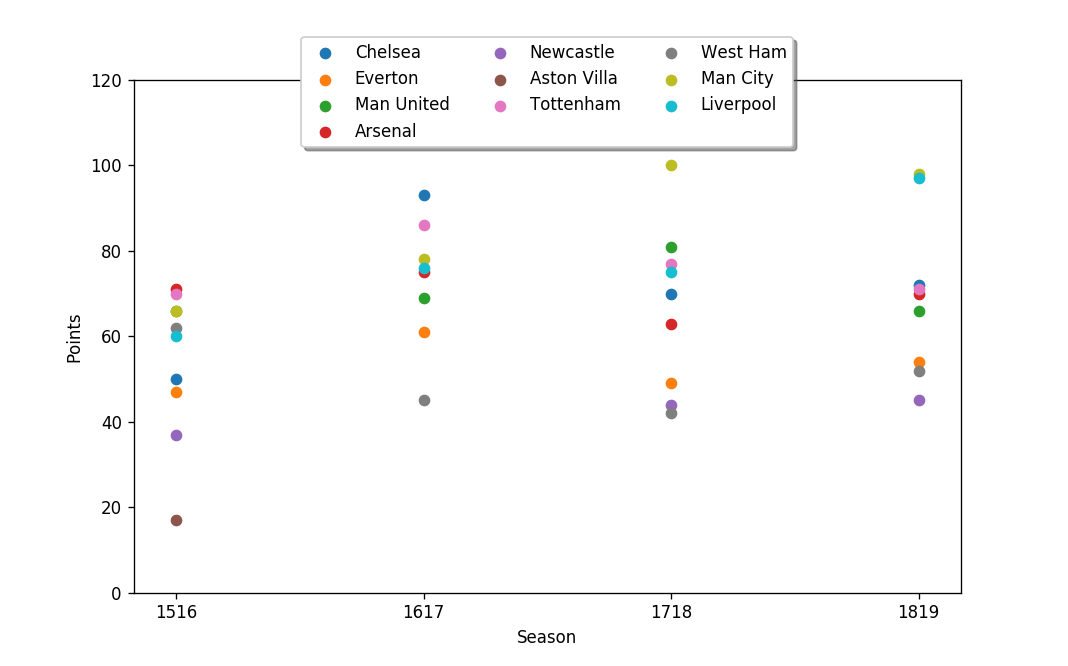

In [74]:
# Plot season scores by team
plot_points_by_team_season(filter_teams=teams_arr,filter_seasons=['1516','1617','1718','1819'])

In [99]:
# Average ranking of point total per season
# NEXT: Include 'recency' to assign relative weighting for nearer ranks
tmp_df = points_by_team_season()
tmp_df = tmp_df.rank(axis=1,ascending=False)
tmp_df = tmp_df.agg(['mean','count']).T\
        .reset_index().rename(columns={'index':'TeamName'})\
        .sort_values(by=['mean'],ascending=True).reset_index(drop=True)
tmp_df

,TeamName,mean,count
0,Man United,2.684211,19.0
1,Arsenal,3.236842,19.0
2,Chelsea,3.289474,19.0
3,Liverpool,4.552632,19.0
4,Tottenham,6.473684,19.0
5,Man City,6.861111,18.0
6,Everton,8.657895,19.0
7,Leeds,10.750000,4.0
8,Newcastle,11.029412,17.0
9,Blackburn,11.500000,11.0


In [165]:
# Weighting ranking by recency
# NEXT: Weighting needs to favour recent rankings more
# * Recalculate weighted mean (divide by sum of weights)
# * Maybe inverse tan
def weighted_mean(x,w):
    

tmp_df = points_by_team_season()
tmp_df = tmp_df.set_index('Season').T
tmp_df = tmp_df.rank(axis=0,ascending=False)
max_rank = max(tmp_df.iloc[:,-2])
tmp_df = tmp_df.fillna(max_rank)
season_weights=pd.DataFrame(sorted_seasons).rank(ascending=False)[0].values
tmp_df = tmp_df.apply(lambda x: np.multiply(x,season_weights),axis=1)
'''
tmp_df = tmp_df.agg('mean',axis=1).reset_index().rename(columns={'index':'TeamName',0:'WeightedMeanRank'})\
        .sort_values(by=['WeightedMeanRank'],axis=0).reset_index(drop=True)
'''
tmp_df

Season,0001,0102,0203,0304,0405,0506,0607,0708,0809,0910,1011,1112,1213,1314,1415,1516,1617,1718,1819
Bournemouth,380.0,360.0,340.0,320.0,300.0,280.0,260.0,240.0,220.0,200.0,180.0,160.0,140.0,120.0,100.0,62.0,25.5,22.0,13.5
Chelsea,114.0,108.0,68.0,32.0,15.0,14.0,26.0,24.0,33.0,10.0,22.5,48.0,21.0,18.0,5.0,40.0,3.0,10.0,3.0
Everton,294.5,270.0,119.0,272.0,60.0,154.0,78.0,60.0,55.0,80.0,63.0,56.0,42.0,30.0,57.5,46.0,21.0,16.0,8.0
Leicester,247.0,360.0,340.0,304.0,300.0,280.0,260.0,240.0,220.0,200.0,180.0,160.0,140.0,120.0,70.0,4.0,37.5,18.0,9.5
Man United,19.0,54.0,17.0,48.0,45.0,28.0,13.0,12.0,11.0,20.0,9.0,12.0,7.0,42.0,20.0,18.0,18.0,4.0,6.0
Norwich,380.0,360.0,340.0,320.0,277.5,280.0,260.0,240.0,220.0,200.0,180.0,88.0,77.0,108.0,100.0,76.0,60.0,40.0,20.0
Arsenal,38.0,18.0,34.0,16.0,30.0,56.0,45.5,36.0,44.0,30.0,36.0,24.0,28.0,24.0,15.0,8.0,15.0,12.0,5.0
Newcastle,209.0,72.0,51.0,88.0,202.5,98.0,169.0,144.0,198.0,200.0,117.0,40.0,105.0,60.0,75.0,72.0,60.0,22.0,13.5
Stoke,380.0,360.0,340.0,320.0,300.0,280.0,260.0,240.0,126.5,110.0,117.0,108.0,91.0,54.0,45.0,36.0,37.5,37.0,20.0
West Brom,380.0,360.0,323.0,320.0,255.0,266.0,260.0,240.0,214.5,200.0,94.5,88.0,56.0,102.0,65.0,56.0,31.5,40.0,20.0


In [128]:
season_weights=pd.DataFrame(sorted_seasons).rank(ascending=False)[0].values
np.multiply(tmp_df.Chelsea,season_weights)
max(tmp_df)

'Wolves'